1. import file
2. split into test and train
3. discover and visualize data to gain insights
- look for correlations (df.corr())
- scatter_matrix
- derive new relationships
- explore relationships
4. encode categorical variables
5. column transformation or pipeline
6. Fit the model on train sets
7. check performance on train set
8. cross validate, check performance, choose a model
9. grid search with best model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
meter = pd.read_csv('combined_data.csv')
meter.head()

,Unnamed: 0,meter_id,w_timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675


In [3]:
meter.shape

(306708, 14)

> **Data Preparation**

In [4]:
meter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306708 entries, 0 to 306707
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      306708 non-null  int64  
 1   meter_id        306708 non-null  object 
 2   w_timestamp     306708 non-null  object 
 3   current         306708 non-null  float64
 4   voltage         306708 non-null  float64
 5   frequency       306708 non-null  float64
 6   power_factor    306708 non-null  float64
 7   energy          306705 non-null  float64
 8   real_power      306708 non-null  float64
 9   reactive_power  306708 non-null  float64
 10  apparent_power  306708 non-null  float64
 11  tita            306708 non-null  float64
 12  hour            306708 non-null  int64  
 13  time_diff       306708 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 32.8+ MB


1. drop `unnamed` column
2. drop null rows
3. incorrect datatype of w_timestamp
4. incorrect hour

1. drop unnecesary column
2. drop null row
3. change datatype of `w_timestamp` to datetime
4. correct hour column by extracting from timestamp

In [5]:
# 1.
meter.drop(columns= 'Unnamed: 0', inplace = True)
# 2.
meter.dropna(axis='index', inplace = True)
# 3.
meter.rename(columns={'w_timestamp':'timestamp'}, inplace=True)
meter['timestamp'] = pd.to_datetime(meter['timestamp'])
# 4.
meter['hour'] = meter['timestamp'].dt.hour

In [6]:
meter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306705 entries, 1 to 306707
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   meter_id        306705 non-null  object             
 1   timestamp       306705 non-null  datetime64[ns, UTC]
 2   current         306705 non-null  float64            
 3   voltage         306705 non-null  float64            
 4   frequency       306705 non-null  float64            
 5   power_factor    306705 non-null  float64            
 6   energy          306705 non-null  float64            
 7   real_power      306705 non-null  float64            
 8   reactive_power  306705 non-null  float64            
 9   apparent_power  306705 non-null  float64            
 10  tita            306705 non-null  float64            
 11  hour            306705 non-null  int64              
 12  time_diff       306705 non-null  float64            
dtypes: datetime64[

In [7]:
meter.describe()

,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
count,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000,306705.000000
mean,1.692306,224.184679,50.156339,0.747983,0.006226,0.299878,0.204739,0.375112,39.159937,11.425242,0.010583
std,1.588366,20.359360,0.264998,0.170627,0.217799,0.307118,0.167439,0.336887,15.472463,7.334237,0.002790
min,0.020000,63.180000,48.900000,0.000000,0.000000,0.000000,0.000000,0.004308,0.000000,0.000000,0.009675
25%,0.690000,215.550000,50.000000,0.690000,0.001233,0.123932,0.066423,0.160977,30.683417,5.000000,0.009675
50%,1.410000,230.000000,50.100000,0.760000,0.002294,0.225886,0.172582,0.308560,40.535802,11.000000,0.009675
75%,2.190000,237.700000,50.300000,0.860000,0.003799,0.368108,0.301727,0.481400,46.369891,18.000000,0.009759
max,14.920000,269.900000,51.400000,1.000000,68.100813,2.970418,1.254506,2.970418,90.000000,23.000000,0.019465


In [8]:
on23 = meter[meter['meter_id'] == "OND023"]
oy21 = meter[meter['meter_id'] == "OYO021"]
on21 = meter[meter['meter_id'] == "OND021"]
on24 = meter[meter['meter_id'] == "OND024"]

In [9]:
on23 = on23.iloc[:,1:]
on23.head()

,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
1,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,13,0.009675
2,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,14,0.009675
3,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,14,0.009675
4,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,14,0.009675
5,2022-07-12 14:02:10.738666+00:00,0.75,208.1,49.9,0.75,0.001164,0.117056,0.103234,0.156075,41.409622,14,0.009675


check for correlations


In [10]:
on23.corr()['energy'].sort_values(ascending=False)

energy            1.000000
real_power        0.038772
apparent_power    0.038571
current           0.038415
reactive_power    0.033633
power_factor      0.013187
hour              0.003584
voltage           0.003235
frequency        -0.004365
tita             -0.014411
time_diff              NaN
Name: energy, dtype: float64

In [11]:
on23.drop('time_diff',axis=1,inplace=True)

- check for skewness
- check for outliers
- apply logarithmic transform

In [12]:
on23.skew(numeric_only=True)

current             2.336031
voltage            -0.512830
frequency          -0.226076
power_factor       -1.530984
energy            159.885407
real_power          2.609177
reactive_power      1.438171
apparent_power      2.339627
tita                0.358579
hour               -0.003529
dtype: float64

In [13]:
on23_copy = on23.copy()

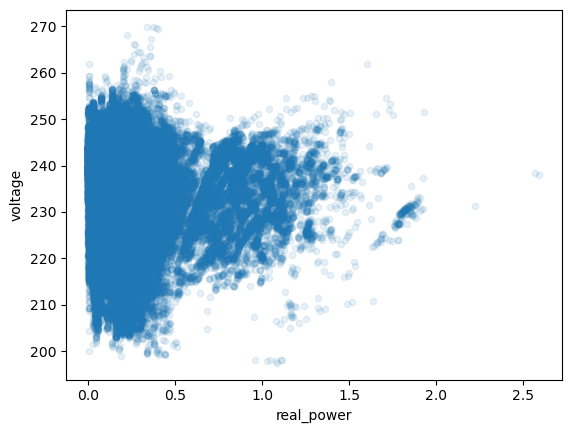

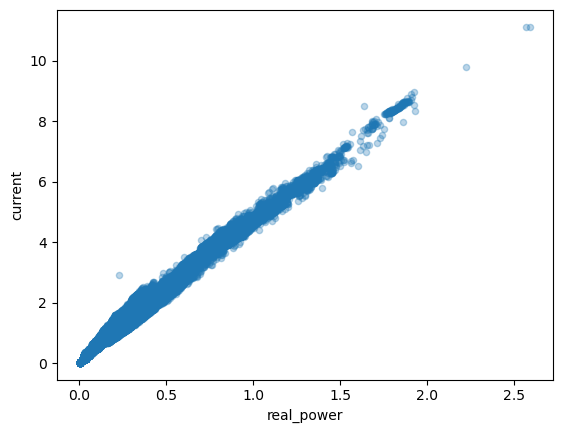

In [14]:
on23.plot(kind='scatter', x='real_power', y='voltage',alpha=0.1)
on23.plot(kind='scatter',x='real_power',y='current',alpha=0.3);
# on23.plot(kind='scatter',x='real_power',y='real_power',alpha=0.3);

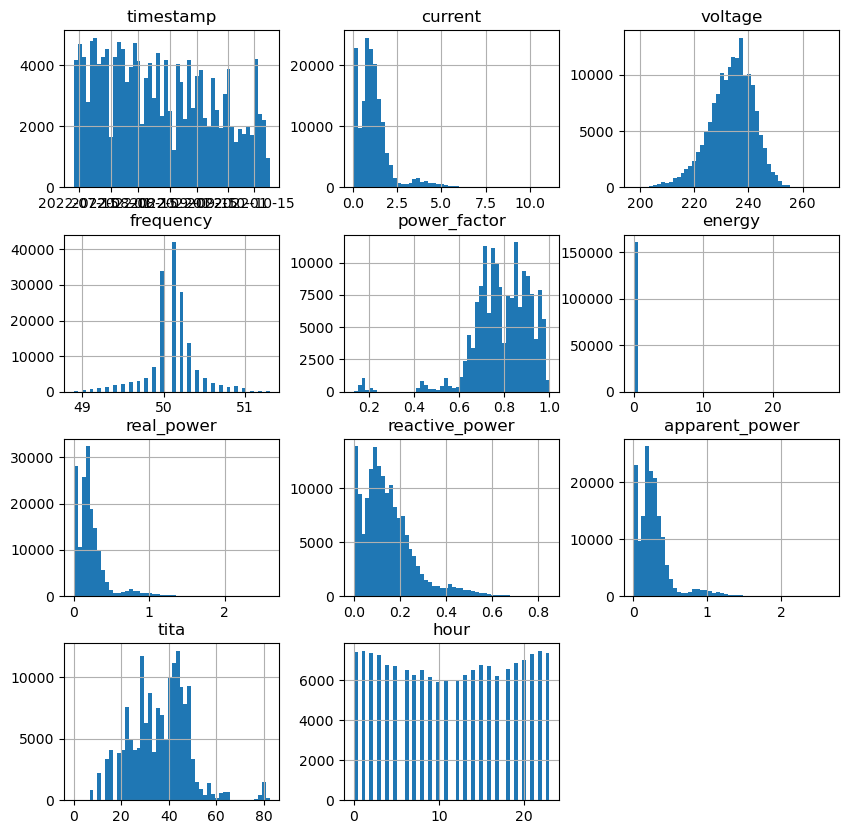

In [15]:
on23.hist(bins=50, figsize=[10,10]);

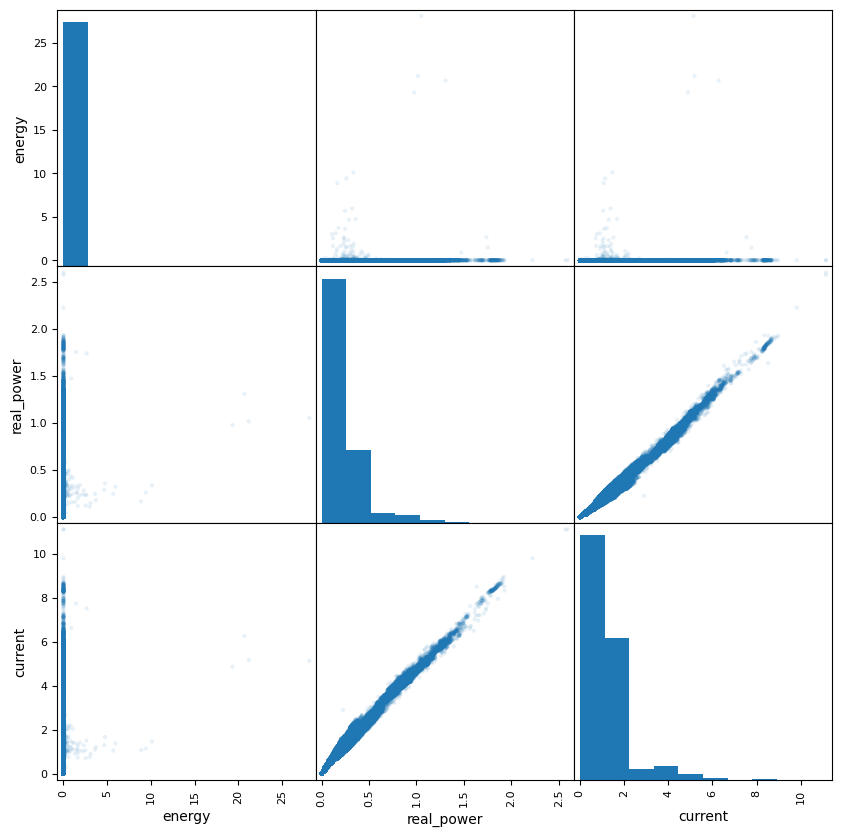

In [16]:
from pandas.plotting import scatter_matrix
col = ['energy','real_power','current']
scatter_matrix(on23[col],figsize=[10,10],alpha=0.1);

- no strong positive correlation btw energy and other quantities
- strong positive correlation btw current and real_power

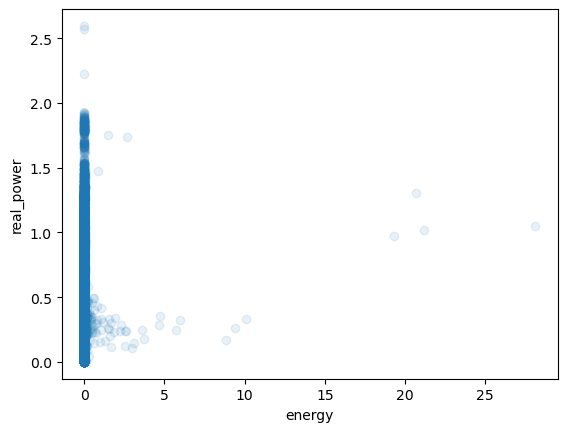

In [17]:
plt.scatter(x=on23_copy['energy'],y=on23_copy['real_power'],alpha=0.1)
plt.xlabel('energy')
plt.ylabel('real_power');

In [18]:
on23_copy[on23_copy['energy'] >= 10]

,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour
39276,2022-08-01 14:23:55.344421+00:00,1.48,238.9,50.1,0.95,10.109917,0.335893,0.110403,0.353572,18.194872,14
106223,2022-09-09 13:14:49.295144+00:00,5.19,227.6,50.2,0.86,21.180010,1.015870,0.602782,1.181244,30.683417,13
131583,2022-09-26 05:37:38.091642+00:00,6.28,236.6,49.6,0.88,20.664537,1.307546,0.705739,1.485848,28.357637,5
133562,2022-09-28 09:46:35.554955+00:00,4.89,232.2,50.3,0.86,19.310304,0.976494,0.579417,1.135458,30.683417,9
140491,2022-10-03 13:02:47.038115+00:00,5.15,234.5,49.9,0.87,28.091988,1.050677,0.595446,1.207675,29.541361,13


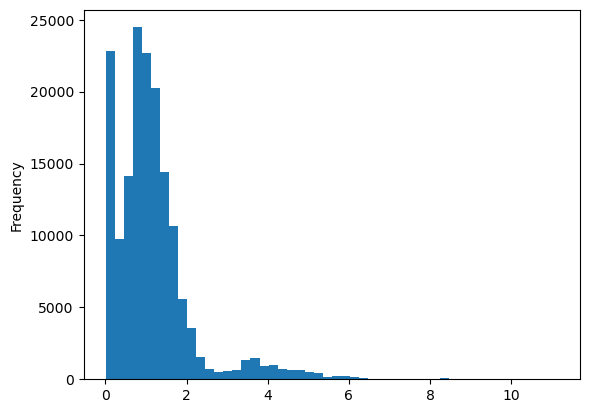

In [19]:
on23_copy['current'].plot(kind='hist',bins=50);

In [20]:
on23_copy['current'].describe()

count    161083.000000
mean          1.173422
std           0.995582
min           0.020000
25%           0.630000
50%           1.000000
75%           1.450000
max          11.130000
Name: current, dtype: float64

- no strong positive correlation
- no energy consumed around 12 and 18
- most of the energy is 0.

In [21]:
on23_copy.reset_index().drop(columns='index',inplace=True)

In [22]:
on23_copy['time'] = on23_copy['timestamp']

In [23]:
on23_copy['time'] = on23_copy['time'].dt.date

In [24]:
on23_copy.drop(columns=['tita','hour'], inplace=True)

In [25]:
on23_copy

,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,time
1,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,2022-07-12
2,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,2022-07-12
3,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,2022-07-12
4,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,2022-07-12
5,2022-07-12 14:02:10.738666+00:00,0.75,208.1,49.9,0.75,0.001164,0.117056,0.103234,0.156075,2022-07-12
...,...,...,...,...,...,...,...,...,...,...
161079,2022-10-22 21:35:34.272836+00:00,1.92,229.1,49.9,0.90,0.003651,0.395885,0.191736,0.439872,2022-10-22
161080,2022-10-22 21:36:08.484019+00:00,1.63,229.1,49.9,0.93,0.003300,0.347293,0.137259,0.373433,2022-10-22
161081,2022-10-22 21:36:43.545834+00:00,1.62,229.5,50.0,0.93,0.003368,0.345765,0.136655,0.371790,2022-10-22
161082,2022-10-22 21:38:28.735422+00:00,1.50,230.9,50.1,0.75,0.007590,0.259763,0.229089,0.346350,2022-10-22


In [26]:
on23_daily = on23_copy.groupby('time').mean()

- `current`: mean
- `voltage`: mean
- `frequency`: mean
- `power_factor`: mean
- `energy`: sum
- `real_power`: 

In [27]:
on23_daily

,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
time,,,,,,,,
2022-07-12,1.264767,215.932616,50.142055,0.789415,0.002804,0.220145,0.152868,0.273444
2022-07-13,1.015747,223.766957,50.149153,0.751673,0.002227,0.171455,0.144557,0.228854
2022-07-14,0.917851,222.114286,50.058425,0.795661,0.001771,0.161804,0.114851,0.201568
2022-07-15,1.008921,216.058370,49.967885,0.783357,0.001913,0.177942,0.115879,0.217064
2022-07-16,1.221234,225.435680,49.934767,0.792342,0.002430,0.234307,0.133035,0.276366
...,...,...,...,...,...,...,...,...
2022-10-18,0.597659,231.221303,49.963569,0.854003,0.001357,0.116571,0.070854,0.139314
2022-10-19,0.193119,239.182798,49.995309,0.290683,0.000379,0.032701,0.030671,0.045718
2022-10-20,0.905805,240.623139,49.981891,0.816429,0.002096,0.184317,0.103143,0.217260


In [28]:
train = on23_daily[:-20]

In [29]:
test = on23_daily[-20:]

In [30]:
train.corr()['energy'].sort_values(ascending=False)

energy            1.000000
current           0.467234
real_power        0.466923
apparent_power    0.460726
reactive_power    0.424550
power_factor      0.147692
frequency         0.073055
voltage          -0.136589
Name: energy, dtype: float64

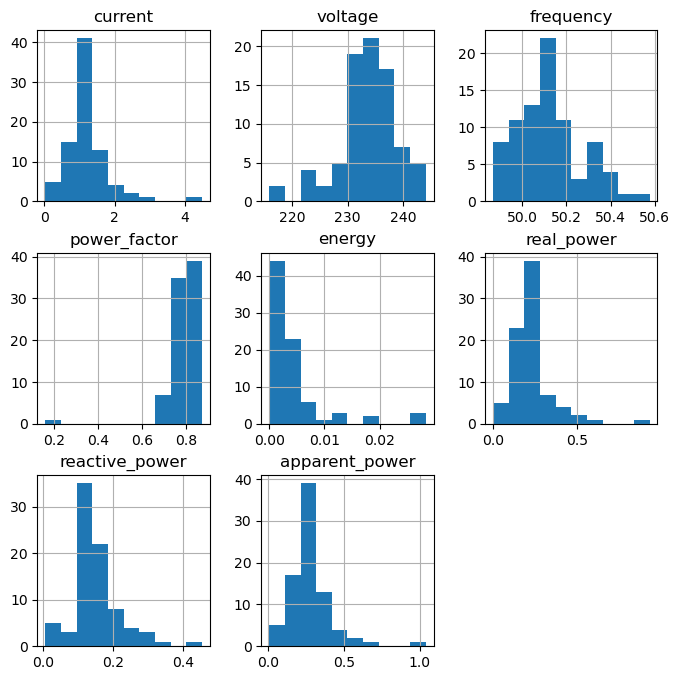

In [31]:
train.hist(figsize=[8,8]);

In [32]:
train_data = train.drop('energy',axis=1).rename(columns={'time':'date'})
target = train['energy'].copy()

In [33]:
train_data.columns

Index(['current', 'voltage', 'frequency', 'power_factor', 'real_power',
       'reactive_power', 'apparent_power'],
      dtype='object')

In [37]:
train

,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power
time,,,,,,,,
2022-07-12,1.264767,215.932616,50.142055,0.789415,0.002804,0.220145,0.152868,0.273444
2022-07-13,1.015747,223.766957,50.149153,0.751673,0.002227,0.171455,0.144557,0.228854
2022-07-14,0.917851,222.114286,50.058425,0.795661,0.001771,0.161804,0.114851,0.201568
2022-07-15,1.008921,216.058370,49.967885,0.783357,0.001913,0.177942,0.115879,0.217064
2022-07-16,1.221234,225.435680,49.934767,0.792342,0.002430,0.234307,0.133035,0.276366
...,...,...,...,...,...,...,...,...
2022-09-27,0.983635,233.145936,50.384292,0.816804,0.002530,0.191125,0.117611,0.229322
2022-09-28,0.673042,223.506806,50.124583,0.859778,0.028282,0.128304,0.071246,0.150335
2022-09-29,1.952272,237.132312,49.956895,0.768841,0.004388,0.383449,0.239943,0.458824


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = scaler.fit_transform(train_data)

In [43]:
pd.Series(train.index)

0     2022-07-12
1     2022-07-13
2     2022-07-14
3     2022-07-15
4     2022-07-16
         ...    
77    2022-09-27
78    2022-09-28
79    2022-09-29
80    2022-09-30
81    2022-10-01
Name: time, Length: 82, dtype: object

In [45]:
scaled_train_data = pd.concat([pd.Series(train.index),pd.DataFrame(data,columns=train_data.columns)],axis='columns')

In [46]:
scaled_train_data

,time,current,voltage,frequency,power_factor,real_power,reactive_power,apparent_power
0,2022-07-12,0.106176,-3.291355,0.138287,0.004190,-0.089509,0.039888,-0.050590
1,2022-07-13,-0.310962,-1.824722,0.186996,-0.457745,-0.485441,-0.084408,-0.370567
2,2022-07-14,-0.474949,-2.134112,-0.435566,0.080644,-0.563915,-0.528663,-0.566364
3,2022-07-15,-0.322396,-3.267813,-1.056838,-0.069953,-0.432689,-0.513298,-0.455168
4,2022-07-16,0.033253,-1.512328,-1.284088,0.040025,0.025656,-0.256712,-0.029621
...,...,...,...,...,...,...,...,...
77,2022-09-27,-0.364753,-0.068925,1.800483,0.339413,-0.325491,-0.487383,-0.367204
78,2022-09-28,-0.885031,-1.873424,0.018400,0.865386,-0.836326,-1.180784,-0.934004
79,2022-09-29,1.257824,0.677347,-1.132250,-0.247619,1.238429,1.342121,1.279673
80,2022-09-30,-0.331750,0.690328,-0.456888,0.143378,-0.298629,-0.327312,-0.311433


In [48]:
scaled_train_data.info(

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            82 non-null     object 
 1   current         82 non-null     float64
 2   voltage         82 non-null     float64
 3   frequency       82 non-null     float64
 4   power_factor    82 non-null     float64
 5   real_power      82 non-null     float64
 6   reactive_power  82 non-null     float64
 7   apparent_power  82 non-null     float64
dtypes: float64(7), object(1)
memory usage: 5.2+ KB
